# Phân Tích Dữ Liệu Bất Động Sản Nhà Tốt

Notebook này phân tích dữ liệu bất động sản từ Nhatot.com với nhiều góc độ khác nhau.

## 1. Import Libraries và Đọc Dữ Liệu

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Đọc dữ liệu
df = pd.read_csv('nhatot_crawl4ai.csv', encoding='utf-8')

# Hiển thị thông tin cơ bản
print("Kích thước dữ liệu:", df.shape)
print("\nCác cột:", df.columns.tolist())

Kích thước dữ liệu: (15765, 13)

Các cột: ['Giá bán', 'Thành phố', 'Phường/Xã', 'Diện tích (m2)', 'Loại hình', 'Giấy tờ pháp lý', 'Hướng', 'Chiều ngang (m)', 'Chiều dài (m)', 'Số phòng ngủ', 'Số phòng vệ sinh', 'Số tầng', 'Tình trạng nội thất']


## 2. Tiền Xử Lý Giá

In [4]:
def clean_price(value):
    if isinstance(value, str):
        value = value.replace('"', '').replace(',', '.')
        if 'tỷ' in value.lower():
            return float(value.lower().replace(' tỷ', '').replace('tỷ', '').strip()) * 1e9
        elif 'triệu' in value.lower():
            return float(value.lower().replace(' triệu', '').replace('triệu', '').strip()) * 1e6
        else:
            try:
                return float(value.strip())
            except:
                return np.nan
    else:
        try:
            return float(value)
        except:
            return np.nan

df['Giá bán'] = df['Giá bán'].apply(clean_price)
df = df.dropna(subset=['Giá bán'])
df = df[df['Giá bán'] > 0]  # Loại bỏ giá âm hoặc bằng 0

print(f"Số lượng bản ghi sau khi làm sạch: {len(df)}")
print(f"Giá trung bình: {df['Giá bán'].mean():,.0f} VND")
print(f"Giá cao nhất: {df['Giá bán'].max():,.0f} VND")
print(f"Giá thấp nhất: {df['Giá bán'].min():,.0f} VND")

Số lượng bản ghi sau khi làm sạch: 4769
Giá trung bình: 7,510,108,492 VND
Giá cao nhất: 399,000,000,000 VND
Giá thấp nhất: 4,400,000 VND


## 3. Phân Tích Theo Thành Phố

PHÂN TÍCH THEO THÀNH PHỐ
                   count          mean           std
Thành phố                                           
Hưng Yên               2  1.330000e+10  7.919596e+09
Hà Nội               369  1.302658e+10  2.319559e+10
Quảng Ninh             1  9.500000e+09           NaN
Khánh Hòa             11  9.414364e+09  8.137053e+09
Bà Rịa - Vũng Tàu     13  7.918800e+09  6.228700e+09
Đà Nẵng              222  7.677104e+09  4.623212e+09
Tp Hồ Chí Minh      3587  7.411980e+09  9.077598e+09
Bình Thuận             3  7.183333e+09  5.010073e+09
Quảng Ngãi             1  7.100000e+09           NaN
Bắc Giang              1  6.660000e+09           NaN
Lâm Đồng              16  6.603188e+09  9.741370e+09
Kiên Giang             2  6.400000e+09  7.919596e+09
Bình Định              3  6.200000e+09  2.475884e+09
Thừa Thiên Huế         1  5.600000e+09           NaN
Bình Dương           271  5.235786e+09  6.159623e+09
Đắk Lắk                6  5.135667e+09  3.912424e+09
Sóc Trăng            

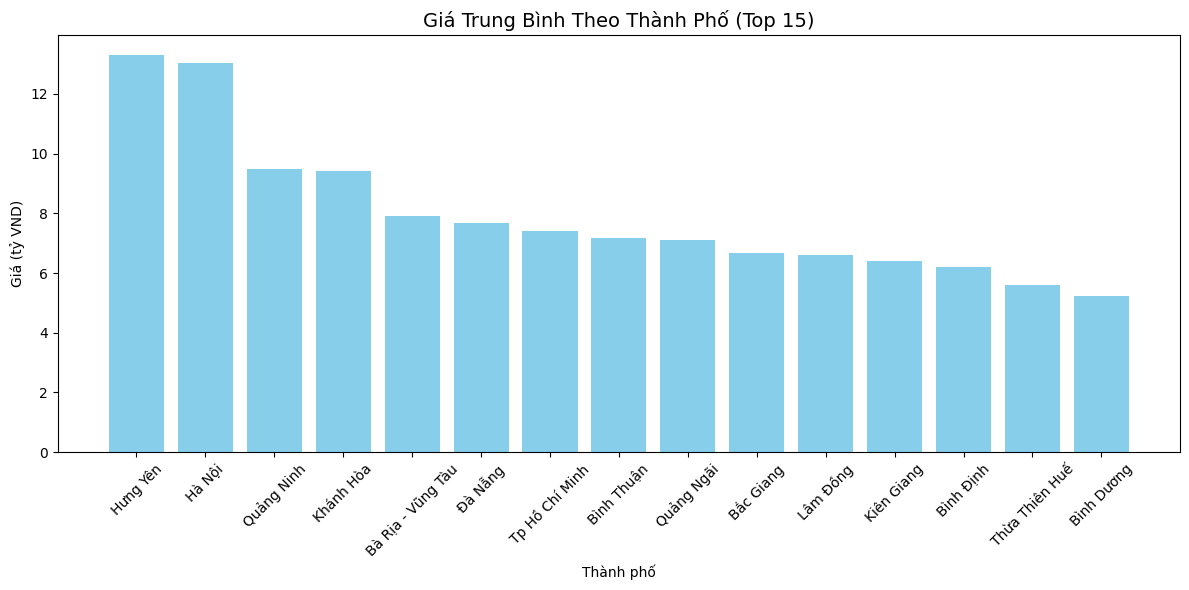

In [5]:
print("=" * 50)
print("PHÂN TÍCH THEO THÀNH PHỐ")
city_price = df.groupby('Thành phố')['Giá bán'].agg(['count', 'mean', 'std']).sort_values('mean', ascending=False)
print(city_price)

plt.figure(figsize=(12, 6))
city_price_top = city_price.head(15)  # Top 15 thành phố
plt.bar(city_price_top.index, city_price_top['mean']/1e9, color='skyblue')
plt.title('Giá Trung Bình Theo Thành Phố (Top 15)', fontsize=14)
plt.xlabel('Thành phố')
plt.ylabel('Giá (tỷ VND)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 4. Phân Tích Theo Loại Hình Nhà

PHÂN TÍCH THEO LOẠI HÌNH NHÀ
                       count          mean           std
Loại hình                                               
Nhà biệt thự             105  2.343154e+10  3.990780e+10
Nhà mặt phố, mặt tiền   1227  1.020774e+10  1.487694e+10
Nhà phố liền kề          224  7.018379e+09  5.416021e+09
Nhà ngõ, hẻm            3213  5.993894e+09  3.744930e+09


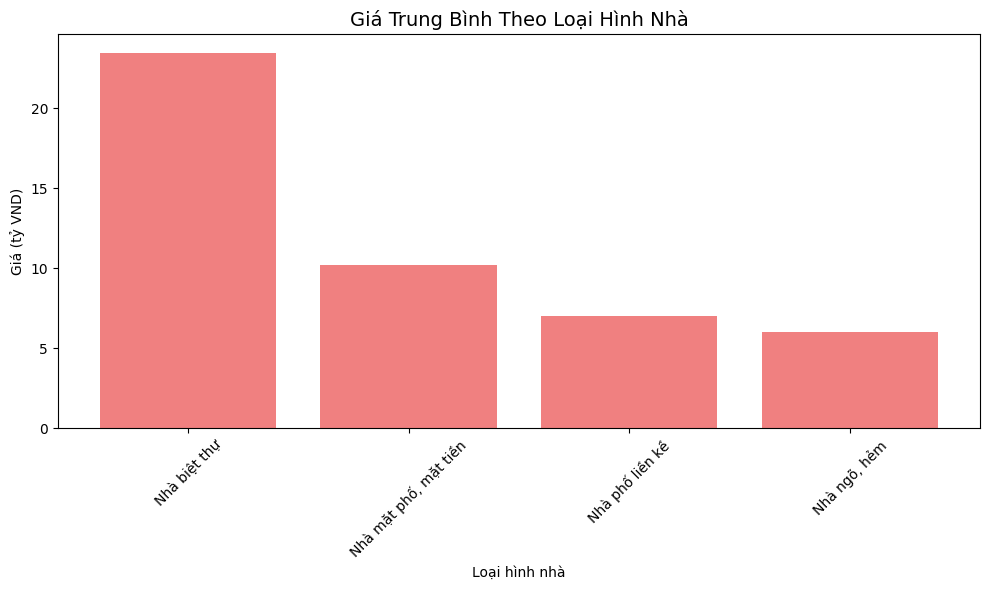

In [6]:
print("=" * 50)
print("PHÂN TÍCH THEO LOẠI HÌNH NHÀ")
type_price = df.groupby('Loại hình')['Giá bán'].agg(['count', 'mean', 'std']).sort_values('mean', ascending=False)
print(type_price)

plt.figure(figsize=(10, 6))
plt.bar(type_price.index, type_price['mean']/1e9, color='lightcoral')
plt.title('Giá Trung Bình Theo Loại Hình Nhà', fontsize=14)
plt.xlabel('Loại hình nhà')
plt.ylabel('Giá (tỷ VND)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 5. Phân Tích Theo Hướng Nhà

PHÂN TÍCH THEO HƯỚNG NHÀ
                count          mean           std
Hướng                                            
Nam               129  9.236760e+09  1.038479e+10
Tây Nam           162  8.430648e+09  1.377924e+10
Đông Nam          221  7.656561e+09  6.943254e+09
Tây Bắc           155  7.632684e+09  8.243162e+09
Đông Bắc          150  7.522069e+09  5.896795e+09
Tây               160  7.488675e+09  8.851130e+09
Không xác định   3534  7.442200e+09  1.116659e+10
Bắc               117  6.870043e+09  5.517555e+09
Đông              141  6.753227e+09  5.158714e+09


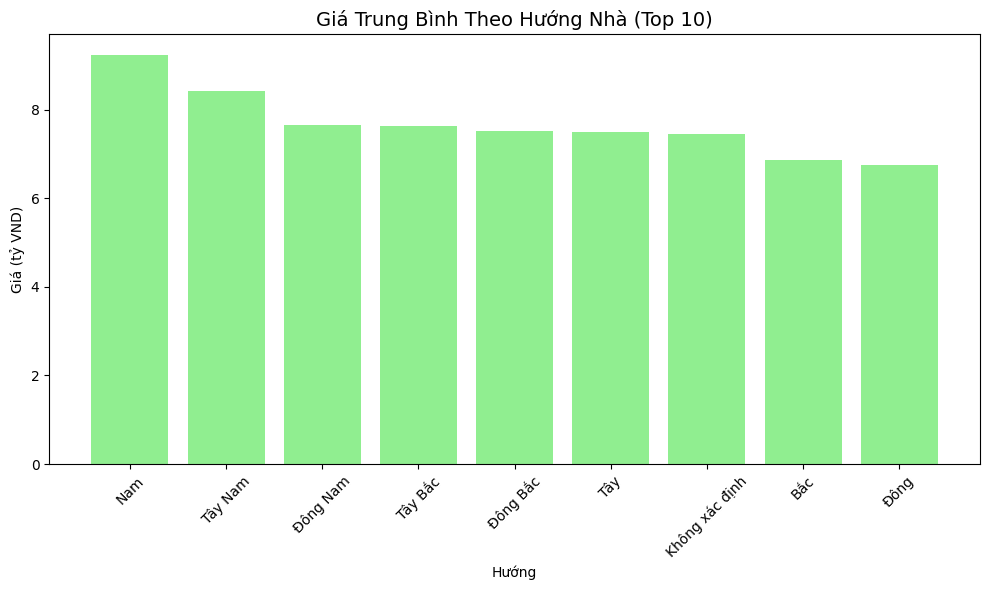

In [7]:
print("=" * 50)
print("PHÂN TÍCH THEO HƯỚNG NHÀ")
# Làm sạch dữ liệu hướng
df['Hướng'] = df['Hướng'].fillna('Không xác định')
direction_price = df.groupby('Hướng')['Giá bán'].agg(['count', 'mean', 'std']).sort_values('mean', ascending=False)
print(direction_price)

plt.figure(figsize=(10, 6))
direction_top = direction_price.head(10)  # Top 10 hướng
plt.bar(direction_top.index, direction_top['mean']/1e9, color='lightgreen')
plt.title('Giá Trung Bình Theo Hướng Nhà (Top 10)', fontsize=14)
plt.xlabel('Hướng')
plt.ylabel('Giá (tỷ VND)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 6. Phân Tích Theo Giấy Tờ Pháp Lý

PHÂN TÍCH THEO GIẤY TỜ PHÁP LÝ
                               count          mean           std
Giấy tờ pháp lý                                                 
Đã có sổ                        4554  7.751930e+09  1.072259e+10
Đang chờ sổ                       35  6.168086e+09  6.503649e+09
Không có sổ                       10  2.818000e+09  1.858923e+09
Giấy tờ viết tay                  19  1.696000e+09  7.276645e+08
Sổ chung / công chứng vi bằng    151  1.570411e+09  7.131162e+08


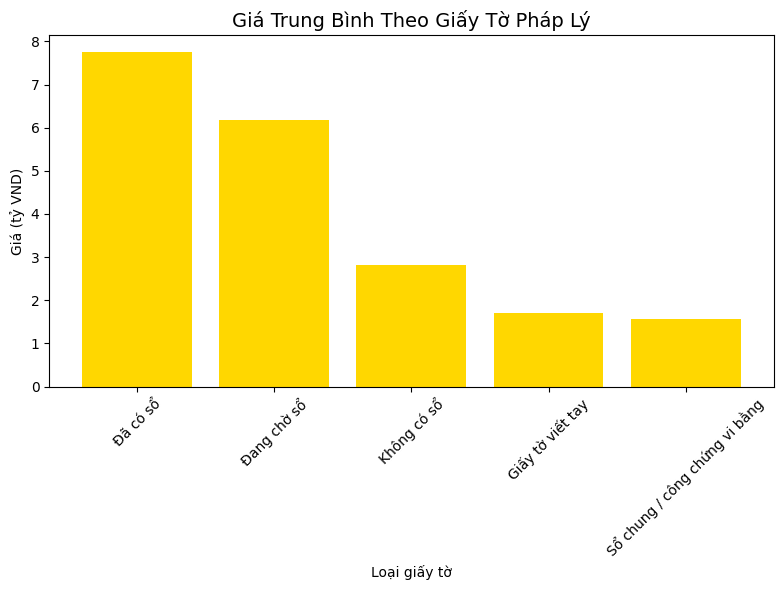

In [8]:
print("=" * 50)
print("PHÂN TÍCH THEO GIẤY TỜ PHÁP LÝ")
df['Giấy tờ pháp lý'] = df['Giấy tờ pháp lý'].fillna('Không xác định')
legal_price = df.groupby('Giấy tờ pháp lý')['Giá bán'].agg(['count', 'mean', 'std']).sort_values('mean', ascending=False)
print(legal_price)

plt.figure(figsize=(8, 6))
plt.bar(legal_price.index, legal_price['mean']/1e9, color='gold')
plt.title('Giá Trung Bình Theo Giấy Tờ Pháp Lý', fontsize=14)
plt.xlabel('Loại giấy tờ')
plt.ylabel('Giá (tỷ VND)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 7. Phân Tích Theo Tình Trạng Nội Thất

PHÂN TÍCH THEO TÌNH TRẠNG NỘI THẤT
                     count          mean           std
Tình trạng nội thất                                   
Nội thất cao cấp       837  8.772466e+09  1.538587e+10
Bàn giao thô            64  8.151438e+09  8.977326e+09
Nội thất đầy đủ       1000  8.001795e+09  1.477253e+10
Không xác định        2254  7.194861e+09  6.363372e+09
Hoàn thiện cơ bản      614  6.078907e+09  5.148488e+09


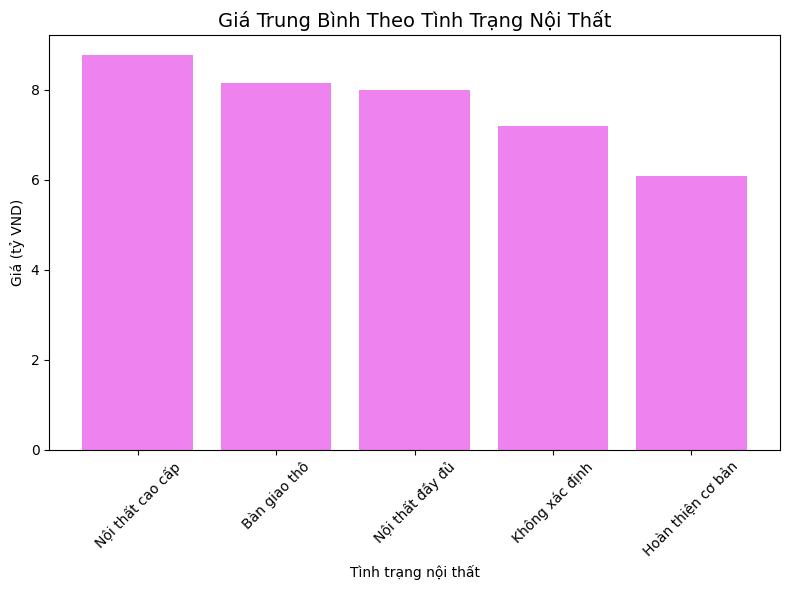

In [9]:
print("=" * 50)
print("PHÂN TÍCH THEO TÌNH TRẠNG NỘI THẤT")
df['Tình trạng nội thất'] = df['Tình trạng nội thất'].fillna('Không xác định')
furniture_price = df.groupby('Tình trạng nội thất')['Giá bán'].agg(['count', 'mean', 'std']).sort_values('mean', ascending=False)
print(furniture_price)

plt.figure(figsize=(8, 6))
plt.bar(furniture_price.index, furniture_price['mean']/1e9, color='violet')
plt.title('Giá Trung Bình Theo Tình Trạng Nội Thất', fontsize=14)
plt.xlabel('Tình trạng nội thất')
plt.ylabel('Giá (tỷ VND)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 8. Phân Tích Theo Số Phòng Ngủ

PHÂN TÍCH THEO SỐ PHÒNG NGỦ
              count          mean           std
Số phòng ngủ                                   
1               163  5.081264e+09  5.193171e+09
2              1319  4.373568e+09  3.225535e+09
3              1331  6.251527e+09  4.552201e+09
4              1153  8.534562e+09  6.187847e+09
5               363  1.119485e+10  9.591663e+09
6               194  1.477644e+10  2.776494e+10
7                52  1.327056e+10  1.828423e+10
8                41  1.568071e+10  1.533142e+10
9                21  1.321524e+10  9.763404e+09
10               27  1.262441e+10  4.825037e+09
11              105  2.072264e+10  4.091954e+10


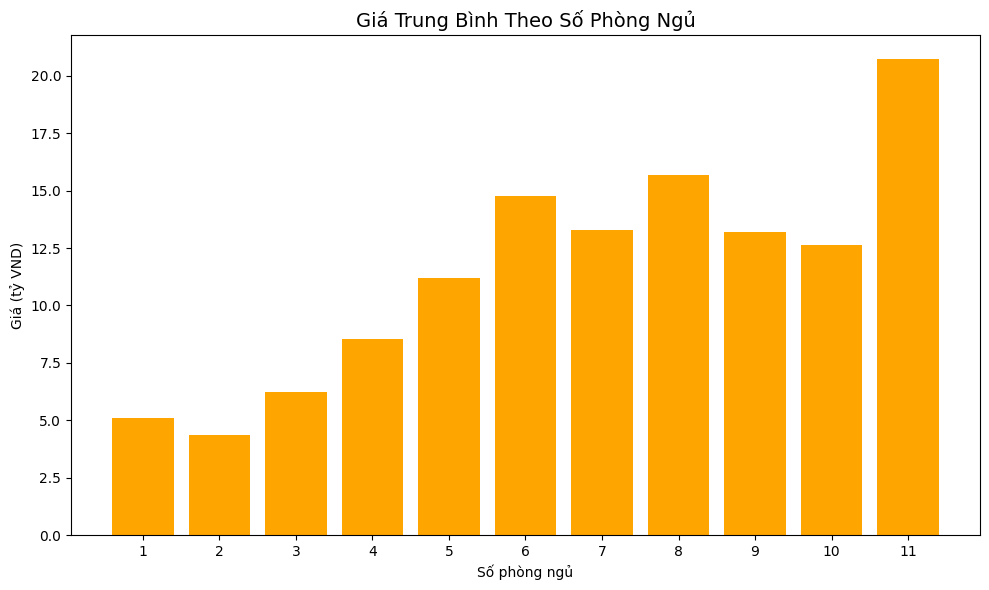

In [10]:
print("=" * 50)
print("PHÂN TÍCH THEO SỐ PHÒNG NGỦ")
df['Số phòng ngủ'] = df['Số phòng ngủ'].apply(lambda x: str(x).replace('nhiều hơn 10', '11')).replace('', np.nan)
df['Số phòng ngủ'] = pd.to_numeric(df['Số phòng ngủ'], errors='coerce')
bedroom_price = df.groupby('Số phòng ngủ')['Giá bán'].agg(['count', 'mean', 'std']).sort_values('Số phòng ngủ')
print(bedroom_price)

plt.figure(figsize=(10, 6))
valid_bedroom = bedroom_price[bedroom_price['count'] >= 5]  # Chỉ lấy giá trị có đủ dữ liệu
plt.bar(valid_bedroom.index.astype(str), valid_bedroom['mean']/1e9, color='orange')
plt.title('Giá Trung Bình Theo Số Phòng Ngủ', fontsize=14)
plt.xlabel('Số phòng ngủ')
plt.ylabel('Giá (tỷ VND)')
plt.tight_layout()
plt.show()

## 9. Phân Tích Theo Số Tầng

PHÂN TÍCH THEO SỐ TẦNG
         count          mean           std
Số tầng                                   
1.0        427  4.939640e+09  8.437133e+09
2.0       1103  5.319901e+09  3.674993e+09
3.0        672  8.808683e+09  1.633712e+10
4.0        572  9.596594e+09  7.301296e+09
5.0        296  1.042836e+10  6.706146e+09
6.0         66  1.528939e+10  6.877609e+09
7.0          9  3.524222e+10  4.036567e+10
8.0          6  1.928333e+10  6.728571e+09
10.0         1  3.990000e+11           NaN
11.0         2  6.145000e+09  1.916259e+09
12.0         1  3.150000e+09           NaN
22.0         3  4.226667e+09  2.243687e+09
33.0         2  4.590000e+09  1.994041e+09
44.0         2  3.075000e+09  3.889087e+08
45.0         1  8.600000e+09           NaN
54.0         1  1.850000e+10           NaN
55.0         2  1.045000e+10  2.050610e+09
66.0         1  1.570000e+10           NaN
88.0         2  3.800000e+10  0.000000e+00


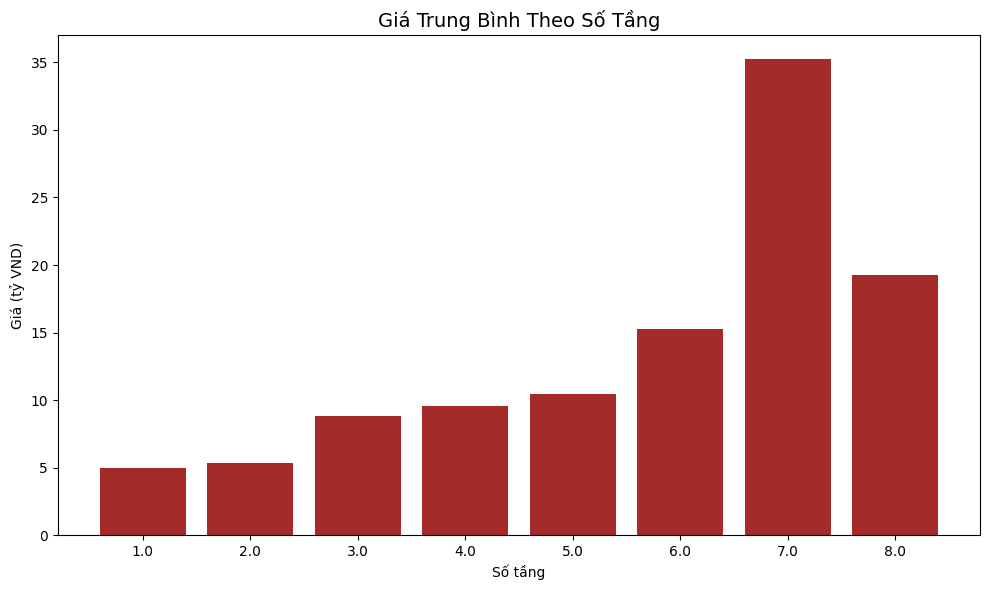

In [11]:
print("=" * 50)
print("PHÂN TÍCH THEO SỐ TẦNG")
df['Số tầng'] = pd.to_numeric(df['Số tầng'], errors='coerce')
floor_price = df.groupby('Số tầng')['Giá bán'].agg(['count', 'mean', 'std']).sort_values('Số tầng')
print(floor_price)

plt.figure(figsize=(10, 6))
valid_floor = floor_price[floor_price['count'] >= 5]  # Chỉ lấy giá trị có đủ dữ liệu
plt.bar(valid_floor.index.astype(str), valid_floor['mean']/1e9, color='brown')
plt.title('Giá Trung Bình Theo Số Tầng', fontsize=14)
plt.xlabel('Số tầng')
plt.ylabel('Giá (tỷ VND)')
plt.tight_layout()
plt.show()

## 10. Đánh Giá Mức Độ Ảnh Hưởng Của Features (CV - Coefficient of Variation)

In [12]:
print("=" * 50)
print("ĐÁNH GIÁ MỨC ĐỘ ẢNH HƯỞNG CỦA TẤT CẢ FEATURE")
print("CV = std(mean_price_per_group) / mean(mean_price_per_group)")

def calculate_feature_cv(group_col, min_count=5):
    """
    CV dựa trên GIÁ TRUNG BÌNH giữa các nhóm của feature
    """
    stats = (
        df.groupby(group_col)['Giá bán']
        .agg(['count', 'mean'])
    )

    stats = stats[stats['count'] >= min_count]

    if len(stats) < 2:
        return np.nan

    mean_prices = stats['mean']
    return mean_prices.std() / mean_prices.mean()

ĐÁNH GIÁ MỨC ĐỘ ẢNH HƯỞNG CỦA TẤT CẢ FEATURE
CV = std(mean_price_per_group) / mean(mean_price_per_group)


### 10.1. Xử Lý Feature Số Liên Tục → Binning

In [ ]:
# Chia nhóm diện tích
df['Nhóm diện tích'] = pd.cut(
    df['Diện tích (m2)'],
    bins=[0, 30, 50, 80, 120, 200, 500, 1000],
    right=False
)

# Chia nhóm chiều ngang
df['Nhóm chiều ngang'] = pd.cut(
    df['Chiều ngang (m)'],
    bins=[0, 3, 4, 5, 6, 8, 12, 20],
    right=False
)

# Chia nhóm chiều dài
df['Nhóm chiều dài'] = pd.cut(
    df['Chiều dài (m)'],
    bins=[0, 8, 12, 16, 20, 30, 50],
    right=False
)

### 10.2. Tính CV Cho Tất Cả Features

In [ ]:
cv_scores = {
    # Vị trí
    'Thành phố': calculate_feature_cv('Thành phố'),
    'Phường/Xã': calculate_feature_cv('Phường/Xã'),

    # Hình thức
    'Loại hình': calculate_feature_cv('Loại hình'),
    'Giấy tờ pháp lý': calculate_feature_cv('Giấy tờ pháp lý'),
    'Hướng': calculate_feature_cv('Hướng'),
    'Tình trạng nội thất': calculate_feature_cv('Tình trạng nội thất'),

    # Kích thước
    'Diện tích': calculate_feature_cv('Nhóm diện tích'),
    'Chiều ngang': calculate_feature_cv('Nhóm chiều ngang'),
    'Chiều dài': calculate_feature_cv('Nhóm chiều dài'),

    # Công năng
    'Số phòng ngủ': calculate_feature_cv('Số phòng ngủ'),
    'Số phòng vệ sinh': calculate_feature_cv('Số phòng vệ sinh'),
    'Số tầng': calculate_feature_cv('Số tầng'),
}

cv_df = (
    pd.DataFrame.from_dict(cv_scores, orient='index', columns=['CV'])
    .dropna()
    .sort_values('CV', ascending=False)
)

print("\nHệ số biến thiên (CV) của toàn bộ feature:")
print(cv_df)

### 10.3. Visualize CV Scores

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(cv_df.index, cv_df['CV'])
plt.title('Độ Biến Động Giá Giữa Các Feature (CV)', fontsize=14)
plt.xlabel('Feature')
plt.ylabel('Hệ số biến thiên (CV)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()